In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv')
df.head()

id diagnostico  exame_1  exame_2  exame_3  exame_4  exame_5  exame_6  \
0    842302           M    17.99    10.38   122.80   103.78   1001.0  0.11840   
1    842517           M    20.57    17.77   132.90   103.78   1326.0  0.08474   
2  84300903           M    19.69    21.25   130.00   103.78   1203.0  0.10960   
3  84348301           M    11.42    20.38    77.58   103.78    386.1  0.14250   
4  84358402           M    20.29    14.34   135.10   103.78   1297.0  0.10030   

   exame_7  exame_8  ...  exame_24  exame_25  exame_26  exame_27  exame_28  \
0  0.27760   0.3001  ...    184.60    2019.0    0.1622    0.6656    0.7119   
1  0.07864   0.0869  ...    158.80    1956.0    0.1238    0.1866    0.2416   
2  0.15990   0.1974  ...    152.50    1709.0    0.1444    0.4245    0.4504   
3  0.28390   0.2414  ...     98.87     567.7    0.2098    0.8663    0.6869   
4  0.13280   0.1980  ...    152.20    1575.0    0.1374    0.2050    0.4000   

   exame_29  exame_30  exame_31  exame_32  exame_33  
0     0.786    0.2654    0.4601   0.11890       NaN  
1     0.786    0.1860    0.2750   0.08902       NaN  
2     0.786    0.2430    0.3613   0.08758       NaN  
3     0.786    0.2575    0.6638   0.17300       NaN  
4     0.786    0.1625    0.2364   0.07678  0.854454  

[5 rows x 35 columns]

In [4]:
from sklearn.model_selection import train_test_split
from numpy import random

SEED = 123143
random.seed(SEED)

valores_exames = df.drop(columns=['id', 'diagnostico'])
diagnostico = df.diagnostico

treino_x, teste_x, treino_y , teste_y = train_test_split(valores_exames, diagnostico)

In [5]:
treino_y.head()

114    B
457    B
269    B
520    B
38     M
Name: diagnostico, dtype: object

In [6]:
from sklearn.ensemble import RandomForestClassifier

classificador = RandomForestClassifier(n_estimators = 100)

classificador.fit(treino_x, treino_y)

print(classificador.score(teste_x, teste_y))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

<AxesSubplot:>

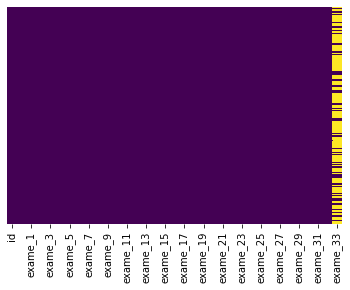

In [7]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import random

SEED = 123143
random.seed(SEED)

valores_exames = df.drop(columns=['id', 'diagnostico', 'exame_33'])
diagnostico = df.diagnostico

treino_x, teste_x, treino_y , teste_y = train_test_split(valores_exames, diagnostico, test_size=0.3)


classificador = RandomForestClassifier(n_estimators = 100)

classificador.fit(treino_x, treino_y)

print(classificador.score(teste_x, teste_y))

0.9239766081871345


## base line

In [9]:
from sklearn.dummy import DummyClassifier

SEED = 123143
random.seed(SEED)

classificador_bobo = DummyClassifier(strategy='most_frequent')
classificador_bobo.fit(treino_x, treino_y)

print((classificador_bobo.score(teste_x, teste_y))*100)

66.66666666666666


## explorando os dados

In [10]:
df_plot = pd.concat([diagnostico, valores_exames.iloc[:,0:10]], axis=1)
df_plot = pd.melt(df_plot, id_vars='diagnostico', var_name='exames', value_name='valores')
df_plot.head()

diagnostico   exames  valores
0           M  exame_1    17.99
1           M  exame_1    20.57
2           M  exame_1    19.69
3           M  exame_1    11.42
4           M  exame_1    20.29

<AxesSubplot:xlabel='exames', ylabel='valores'>

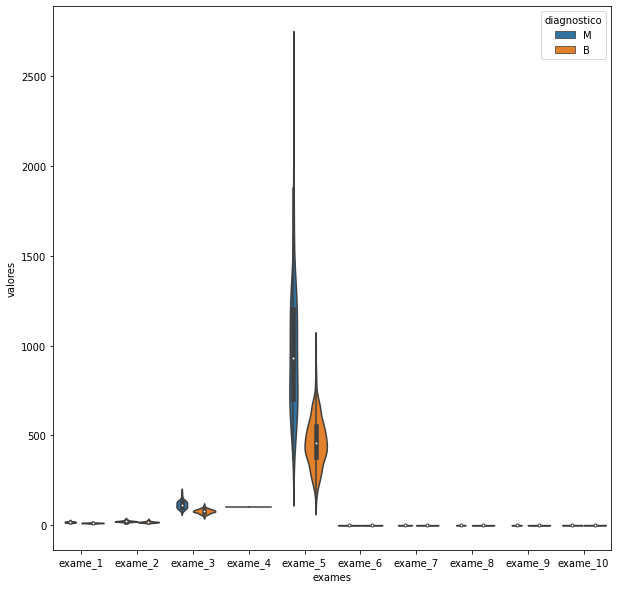

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))


sns.violinplot(data=df_plot, x='exames', y='valores', hue='diagnostico')

In [12]:
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames)
valores_exames_v2 = padronizador.transform(valores_exames)
valores_exames_v2 = pd.DataFrame(data = valores_exames_v2, columns=valores_exames.keys())

<AxesSubplot:xlabel='exames', ylabel='valores'>

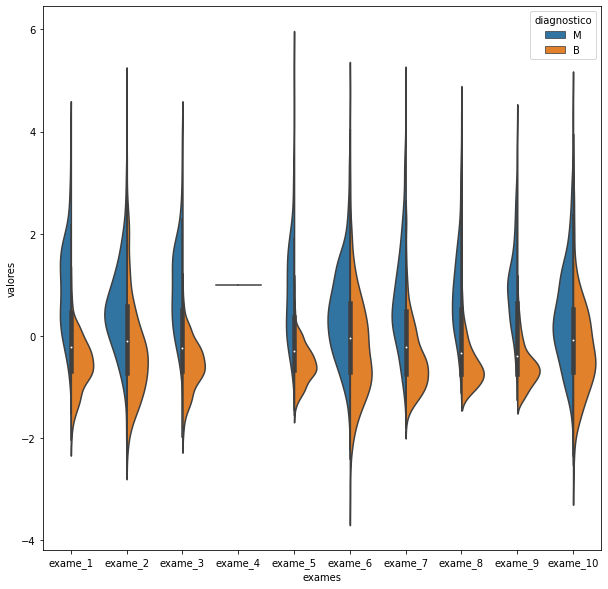

In [13]:
df_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:,0:10]], axis=1)
df_plot = pd.melt(df_plot, id_vars='diagnostico', var_name='exames', value_name='valores')



plt.figure(figsize=(10, 10))


sns.violinplot(data=df_plot, x='exames', y='valores', hue='diagnostico', split=True)
    

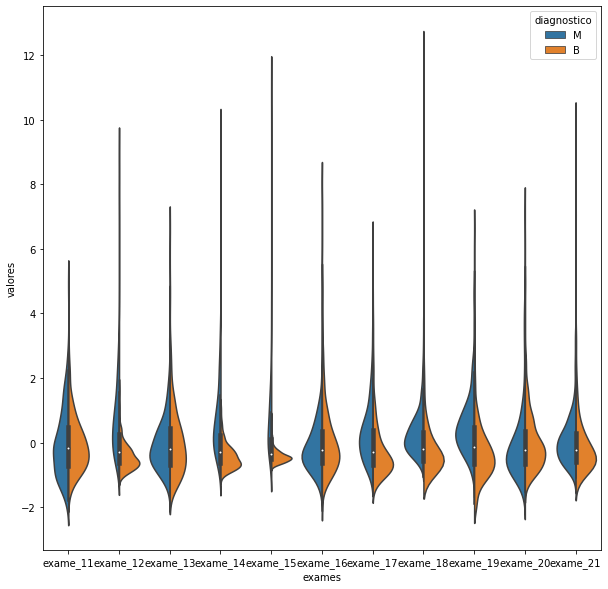

In [14]:
def grafico_violino(valores, inicio, fim):
    df_plot = pd.concat([diagnostico, valores.iloc[:,inicio:fim]], axis=1)
    df_plot = pd.melt(df_plot, id_vars='diagnostico', var_name='exames', value_name='valores')



    plt.figure(figsize=(10, 10))


    sns.violinplot(data=df_plot, x='exames', y='valores', hue='diagnostico', split=True)

grafico_violino(valores_exames_v2, 10, 21)

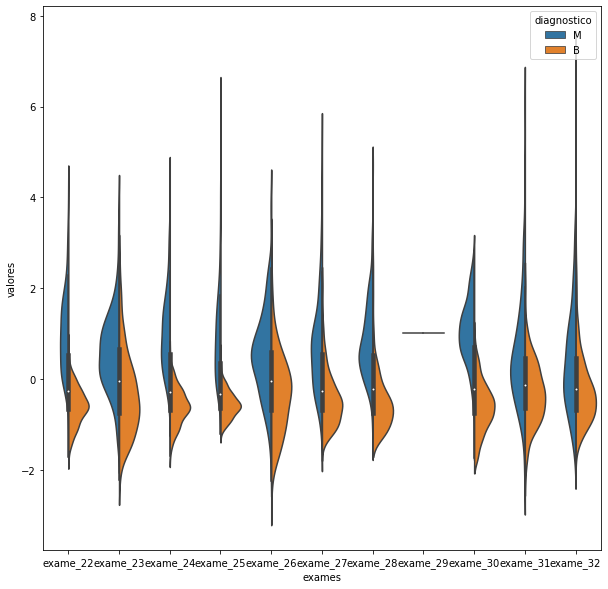

In [15]:
grafico_violino(valores_exames_v2, 21, 32)

In [16]:
%config Completer.use_jedi = False

In [17]:
valores_exames_v3 = valores_exames_v2.drop(columns=['exame_29', 'exame_4'])

def classificar(valores):
    SEED = 1234
    random.seed(SEED)
    treino_x, teste_x, treino_y , teste_y = train_test_split(valores, diagnostico, test_size=0.3)

    classificador = RandomForestClassifier(n_estimators = 100)

    classificador.fit(treino_x, treino_y)

    print('RESULTADO DA CLASSIFICAÇÃO %.2f%%'%(classificador.score(teste_x, teste_y)*100))

In [18]:
classificar(valores_exames_v3)

RESULTADO DA CLASSIFICAÇÃO 92.98%


<AxesSubplot:>

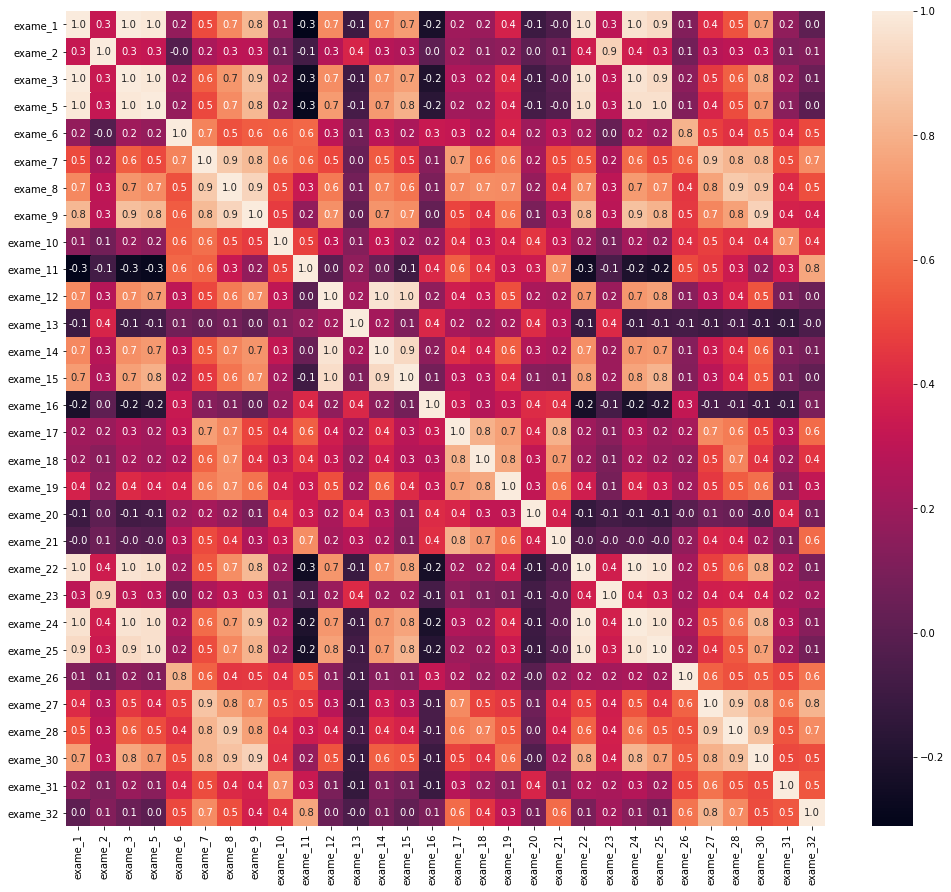

In [19]:
matriz_correlacao = valores_exames_v3.corr()

plt.figure(figsize=(17,15))
sns.heatmap(matriz_correlacao, annot=True, fmt = '.1f')

In [20]:
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao>0.99]
matriz_correlacao_v2 = matriz_correlacao_v1.sum()

In [21]:
matriz_correlacao_v2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [22]:
variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2>1]
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [23]:
valores_exames_v4 = valores_exames_v3.drop(columns=variaveis_correlacionadas.keys())

In [24]:
valores_exames_v4.head()

exame_2   exame_5   exame_6   exame_7   exame_8   exame_9  exame_10  \
0 -2.073335  0.984375  1.568466  3.283515  2.652874  2.532475  2.217515   
1 -0.353632  1.908708 -0.826962 -0.487072 -0.023846  0.548144  0.001392   
2  0.456187  1.558884  0.942210  1.052926  1.363478  2.037231  0.939685   
3  0.253732 -0.764464  3.283553  3.402909  1.915897  1.451707  2.867383   
4 -1.151816  1.826229  0.280372  0.539340  1.371011  1.428493 -0.009560   

   exame_11  exame_12  exame_13  ...  exame_20  exame_21  exame_23  exame_25  \
0  2.255747  2.489734 -0.565265  ...  1.148757  0.907083 -1.359293  2.001237   
1 -0.868652  0.499255 -0.876244  ... -0.805450 -0.099444 -0.369203  1.890489   
2 -0.398008  1.228676 -0.780083  ...  0.237036  0.293559 -0.023974  1.456285   
3  4.910919  0.326373 -0.110409  ...  4.732680  2.047511  0.133984 -0.550021   
4 -0.562450  1.270543 -0.790244  ... -0.361092  0.499328 -1.466770  1.220724   

   exame_26  exame_27  exame_28  exame_30  exame_31  exame_32  
0  1.307686  2.616665  2.109526  2.296076  2.750622  1.937015  
1 -0.375612 -0.430444 -0.146749  1.087084 -0.243890  0.281190  
2  0.527407  1.082932  0.854974  1.955000  1.152255  0.201391  
3  3.394275  3.893397  1.989588  2.175786  6.046041  4.935010  
4  0.220556 -0.313395  0.613179  0.729259 -0.868353 -0.397100  

[5 rows x 26 columns]

In [25]:
classificar(valores_exames_v4)

RESULTADO DA CLASSIFICAÇÃO 91.81%


#### deu pior

In [26]:
valores_exames_v5 = valores_exames_v3.drop(columns=['exame_3', 'exame_24'])

In [27]:
classificar(valores_exames_v5)

RESULTADO DA CLASSIFICAÇÃO 92.98%


#### mesmo resultado mas com menos features

## automatizar melhores features

In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

select_kmelhores = SelectKBest(chi2,k=5)

In [29]:
valores_exames_v6 = valores_exames.drop(columns=['exame_4', 'exame_29', 'exame_3', 'exame_24'])

In [30]:
SEED=1234
random.seed(SEED)

treino_x, teste_x, treino_y , teste_y = train_test_split(valores_exames_v6, diagnostico, test_size=0.3)

select_kmelhores.fit(treino_x, treino_y)
treino_kbest = select_kmelhores.transform(treino_x)
teste_kbest = select_kmelhores.transform(teste_x)

In [31]:
classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_kbest, treino_y)
print('RESULTADO DA CLASSIFICAÇÃO %.2f%%'%(classificador.score(teste_kbest, teste_y)*100))

RESULTADO DA CLASSIFICAÇÃO 92.40%


## amtriz de confusão

In [32]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_kbest))

In [34]:
matriz_confusao

array([[100,   5],
       [  8,  58]], dtype=int64)

[Text(0.5, 38.5, 'Predição'), Text(56.5, 0.5, 'Real')]

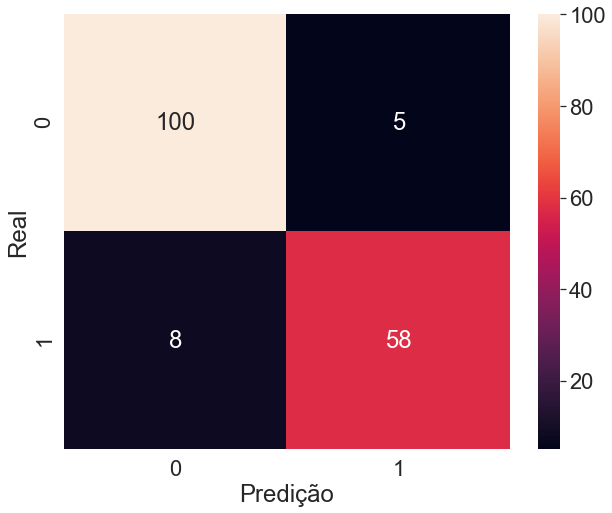

In [37]:
plt.figure(figsize=(10,8))
sns.set(font_scale=2)
sns.heatmap(matriz_confusao, annot=True, fmt='d', ).set(xlabel='Predição', ylabel='Real')

# rfecv

Resultado da classificação 92.98%


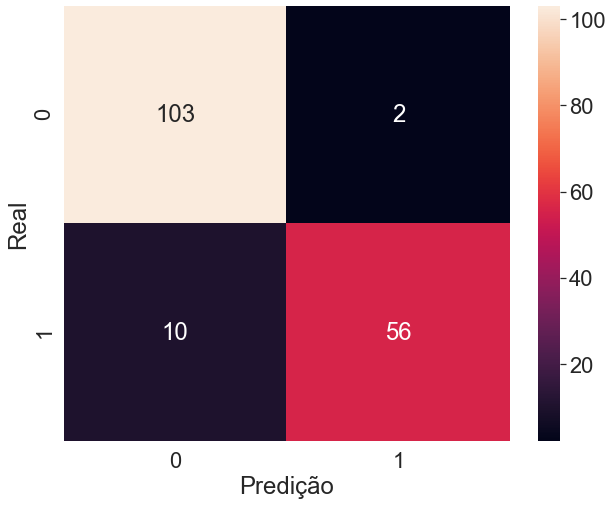

In [39]:
from sklearn.feature_selection import RFECV


SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                       diagnostico,
                                                       test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state = 1234)
classificador.fit(treino_x, treino_y)


selecionador_rfecv = RFECV(estimator = classificador, cv = 5, scoring = "accuracy", step = 1)
selecionador_rfecv.fit(treino_x, treino_y)
treino_rfecv = selecionador_rfecv.transform(treino_x)
teste_rfecv = selecionador_rfecv.transform(teste_x)
classificador.fit(treino_rfecv, treino_y)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfecv))
plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

print("Resultado da classificação %.2f%%" % (classificador.score(teste_rfecv, teste_y)* 100))